In [3]:
import networkx as nx
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
from networkx.readwrite import json_graph
from networkx.algorithms import node_classification
import plotly.graph_objs as go
from ipywidgets import widgets


In [4]:
path = "../cyberlandscape/data.graphml"

#START get  Edge Attribute Fields with id----------------
e_attr_types = []

with open(path) as file:
    soup = BeautifulSoup(file, "lxml")
    edges = soup.findAll("key",{"for":"edge"})

for edge in edges:
    #print (edge['id'])
    if edge.has_attr('attr.name'):
        e_attr_types.append({'id': edge['id'], 'attr':edge['attr.name']})
#STOP get Node Attribute Fields and Edge Attribute Fields with id------------------------

In [5]:
#read graphml
G = nx.read_graphml(path)
edges = G.edges
nodes = G.nodes
nodes_data = nodes.data()
#node ids
nodes_values = nodes.values()
edges_data =  edges.data()
#edge ids
edges_values = edges.values()

In [6]:
print('num of nodes: ', G.number_of_nodes(), 'num of edges: ', G.number_of_edges())

num of nodes:  167 num of edges:  110


In [7]:
list(G.neighbors('n4'))

['n31', 'n27', 'n165', 'n48', 'n0', 'n16', 'n15', 'n13', 'n14', 'n23']

In [8]:
list(G.successors('n4'))

['n31', 'n27', 'n165', 'n48', 'n0', 'n16', 'n15', 'n13', 'n14', 'n23']

In [9]:
pr_numpy = nx.pagerank_numpy(G, alpha=0.9)
pr_scipy = nx.pagerank_scipy(G, alpha=0.9)
pr_scipy

{'n0': 0.031685331478511776,
 'n1': 0.003350907389037193,
 'n2': 0.003350907389037193,
 'n3': 0.003350907389037193,
 'n4': 0.007461199998679496,
 'n5': 0.003350907389037193,
 'n6': 0.02249522636766985,
 'n7': 0.008337817044786746,
 'n8': 0.003350907389037193,
 'n9': 0.03033324268513395,
 'n10': 0.003350907389037193,
 'n11': 0.006366807663797423,
 'n12': 0.0043562074806239364,
 'n13': 0.01459784335886202,
 'n14': 0.017919677926912923,
 'n15': 0.01459784335886202,
 'n16': 0.009680872587285703,
 'n17': 0.013549517687108893,
 'n18': 0.022157337886035865,
 'n19': 0.003350907389037193,
 'n20': 0.003350907389037193,
 'n21': 0.015358914954164218,
 'n22': 0.008581775154333456,
 'n23': 0.04520586609956048,
 'n24': 0.0077301943843202684,
 'n25': 0.006366807663797423,
 'n26': 0.005851586936184849,
 'n27': 0.02014561431598529,
 'n28': 0.007799388792038754,
 'n29': 0.006366807663797423,
 'n30': 0.007384374383684808,
 'n31': 0.006201098944322197,
 'n32': 0.008337817044786746,
 'n33': 0.00987689576624

In [10]:
h,a=nx.hits(G)
#Hubs estimates the node value based on outgoing links.
print ('Hubs: ', h)

Hubs:  {'n0': 0.0, 'n1': 7.108810214840792e-67, 'n2': 0.024431155390008258, 'n3': 0.019679844727734198, 'n4': 0.1314387663148486, 'n5': 0.019679844727734198, 'n6': 0.05164468572518043, 'n7': 0.034281194860267435, 'n8': 0.02065634085217584, 'n9': 0.03471974863290957, 'n10': 0.002136853952025298, 'n11': 0.043065151978804894, 'n12': 0.0, 'n13': 0.022544283126576203, 'n14': 0.03591807338165285, 'n15': 0.022544283126576203, 'n16': 0.03145501878018377, 'n17': 7.108810214840792e-67, 'n18': 0.036701468566567405, 'n19': 0.01167581965256329, 'n20': 0.0017395601052529975, 'n21': 0.013551615080161433, 'n22': 0.00899266804641477, 'n23': 0.09130441208182741, 'n24': 0.0014217341100492779, 'n25': 0.012980760399448373, 'n26': 0.0, 'n27': 0.0017227625760797192, 'n28': 0.0, 'n29': 0.0, 'n30': 0.031160843351215273, 'n31': 0.0297558195844888, 'n32': 0.0, 'n33': 0.0016489618109071854, 'n34': 7.108810214840792e-67, 'n35': 0.0, 'n36': 0.0, 'n37': 8.631540200928815e-05, 'n38': 0.0, 'n39': 0.0, 'n40': 0.0332324

In [11]:
#Authorities estimates the node value based on the incoming links. 
print ('authorities: ', a)

authorities:  {'n0': 0.0781701989820416, 'n1': 0.0, 'n2': 0.0, 'n3': 0.0, 'n4': 0.011827583795141362, 'n5': 0.0, 'n6': 0.0056472619484383224, 'n7': 0.006891600998064117, 'n8': 0.0, 'n9': 0.0003428529159466496, 'n10': 0.0, 'n11': 2.8236864503130343e-66, 'n12': 0.004587548709207268, 'n13': 0.06736706543427298, 'n14': 0.07321827813077982, 'n15': 0.06736706543427298, 'n16': 0.055809807446590774, 'n17': 0.03763120615798072, 'n18': 0.05156080433567078, 'n19': 0.0, 'n20': 0.0, 'n21': 0.05077275157492071, 'n22': 0.03362810856531239, 'n23': 0.05382829295656842, 'n24': 0.014285105269207574, 'n25': 2.8236864503130343e-66, 'n26': 0.006437135234353212, 'n27': 0.046377456638825136, 'n28': 0.008487785393447623, 'n29': 2.8236864503130343e-66, 'n30': 0.006744499344401499, 'n31': 0.030587303866263064, 'n32': 0.006891600998064117, 'n33': 0.008079741358123735, 'n34': 0.0, 'n35': 0.003878734685605628, 'n36': 0.006566843855045305, 'n37': 0.0068429754011819915, 'n38': 0.006519484468658424, 'n39': 0.006240198

In [12]:
g_mat = nx.google_matrix(G)
g_mat

matrix([[0.00598802, 0.00598802, 0.00598802, ..., 0.00598802, 0.00598802,
         0.00598802],
        [0.0008982 , 0.0008982 , 0.0008982 , ..., 0.0008982 , 0.0008982 ,
         0.0008982 ],
        [0.28423154, 0.0008982 , 0.0008982 , ..., 0.0008982 , 0.0008982 ,
         0.0008982 ],
        ...,
        [0.00598802, 0.00598802, 0.00598802, ..., 0.00598802, 0.00598802,
         0.00598802],
        [0.00598802, 0.00598802, 0.00598802, ..., 0.00598802, 0.00598802,
         0.00598802],
        [0.00598802, 0.00598802, 0.00598802, ..., 0.00598802, 0.00598802,
         0.00598802]])

In [13]:
nx.constraint(G)

{'n0': nan,
 'n1': 1.0,
 'n2': 0.3333333333333333,
 'n3': 1.0,
 'n4': 0.1730876422888285,
 'n5': 1.0,
 'n6': 0.2415980795610425,
 'n7': 0.43578125,
 'n8': 0.5,
 'n9': 0.2908950617283951,
 'n10': 1.0,
 'n11': 0.20000000000000004,
 'n12': nan,
 'n13': 0.3868655489809336,
 'n14': 0.23840067184418146,
 'n15': 0.3868655489809336,
 'n16': 0.34413540879314686,
 'n17': 0.39043209876543206,
 'n18': 0.2134375,
 'n19': 1.0,
 'n20': 0.5,
 'n21': 0.375,
 'n22': 0.5555555555555556,
 'n23': 0.1729191321499014,
 'n24': 0.5555555555555556,
 'n25': 0.5,
 'n26': nan,
 'n27': 0.25869261188271603,
 'n28': nan,
 'n29': nan,
 'n30': 0.5555555555555556,
 'n31': 0.5037081916099774,
 'n32': nan,
 'n33': 0.5555555555555556,
 'n34': 1.0,
 'n35': nan,
 'n36': nan,
 'n37': 0.7191358024691358,
 'n38': nan,
 'n39': nan,
 'n40': 0.10476409458459308,
 'n41': nan,
 'n42': 0.5,
 'n43': 0.3333333333333333,
 'n44': 0.5528978052126199,
 'n45': 1.0,
 'n46': 0.5528978052126199,
 'n47': nan,
 'n48': nan,
 'n49': nan,
 'n50': n

In [14]:
def get_subgraph_by_edge_attr(attr):
    #grouping edges by edge attribute
    edges_by_key = []
    for e, datadict in G.edges.items():
        #example: attr = 'oversight.legal'
        key = attr
        if key in datadict:
            #print('datadict by key ;;;;;;;;;;;;;;', datadict[key])
            edges_by_key.append(e)
    G_e_key = G.edge_subgraph(edges_by_key)
    #print(G_e_key.edges.data())
    return G_e_key

#calculate grid for mathplot
e_attr_types_count = len(e_attr_types)
r_count = e_attr_types_count / 2
c_count = e_attr_types_count - r_count
#p=1 left most column
p = 0
count = 0

#get subgraphs for all edge attr
for item in e_attr_types:
    (key, val) = item.items()
    current_edge_attr_type =val[1]
    current_graph =  get_subgraph_by_edge_attr(current_edge_attr_type)
    #print("test+++++++++++++++++++++++++++++", r,c,p)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



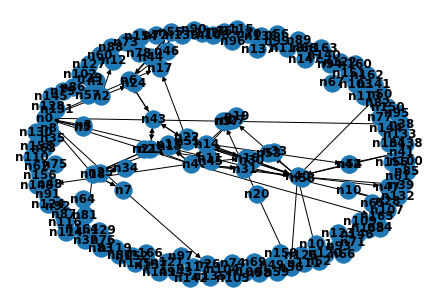

In [15]:
pos = nx.spectral_layout(G)
nx.draw(G, with_labels=True, font_weight='bold')
#print('DEBUG: ---',edges_data)
plt.show()
#print(G.number_of_nodes(), G.number_of_edges())

In [16]:
#acces node position
G.nodes['n0']['x']
G.nodes.values()
for value in G.nodes.values():
    #print (value['x'])
    pass
    
for value in G.edges:
    #get ids source node)
    print (value[0])
    #get ids target node)
    print (value[1])
   

n1
n29
n2
n24
n2
n12
n2
n0
n3
n0
n4
n31
n4
n27
n4
n165
n4
n48
n4
n0
n4
n16
n4
n15
n4
n13
n4
n14
n4
n23
n5
n0
n6
n17
n6
n24
n6
n0
n6
n55
n6
n43
n6
n46
n7
n18
n7
n26
n7
n0
n8
n35
n8
n0
n9
n37
n9
n27
n9
n0
n9
n38
n10
n28
n11
n28
n11
n22
n11
n0
n11
n21
n13
n51
n13
n23
n14
n51
n14
n30
n14
n23
n14
n27
n15
n51
n15
n23
n16
n51
n16
n33
n16
n31
n16
n40
n17
n44
n18
n32
n18
n7
n18
n0
n18
n23
n19
n27
n20
n9
n20
n36
n21
n23
n22
n51
n23
n13
n23
n14
n23
n15
n23
n18
n23
n43
n23
n21
n24
n6
n25
n18
n27
n37
n30
n14
n30
n40
n31
n40
n31
n4
n31
n16
n33
n53
n34
n25
n37
n9
n40
n50
n40
n52
n40
n4
n40
n53
n40
n51
n40
n47
n40
n36
n40
n39
n40
n27
n42
n41
n42
n40
n43
n51
n43
n6
n43
n23
n44
n55
n44
n6
n45
n11
n46
n17
n46
n55
n51
n40
n51
n13
n51
n43
n51
n14
n51
n15
n51
n16
n51
n18
n51
n17
n51
n21
n51
n22
n53
n51
n53
n54
n53
n33
n54
n40
n54
n41
n58
n40


In [17]:
pos = nx.spring_layout(G, k=0.5, iterations=50)
for n, p in pos.items():
    #print (n, p)
    G.node[n]['pos'] = p
    #print(G.node[n])
    
G.nodes['n0']['pos']

array([-0.74649474, -0.49041327])

In [35]:
#Create Edges
#record the coordinates of edge ends
Xe=[]
Ye=[]
for e in G.edges():
    Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
    Ye.extend([pos[e[0]][1], pos[e[1]][1], None])
    
edge_trace = go.Scatter(
    x=Xe,
    y=Ye,
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

#get list of labels for each node
labels = []
for node in G.nodes:
    print(G.nodes[str(node)]['label'])
    labels.append(G.nodes[str(node)]['label'])

#define lists of node coordinates
Xn=[pos['n'+str(k)][0] for k in range(len(pos))]
Yn=[pos['n'+str(k)][1] for k in range(len(pos))]

node_trace = go.Scatter(
    x=Xn,
    y=Yn,
    text=labels,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

Cyber-SR
          
BMG
          
AA
          
BMVI
          
BMI
          
BMJV
          
BMVg
          
BKAmt
          
BMBF
          
BMWi
          
BMZ
          
BMF
          
DIIS
          
Bpol
          
BKA
          
BfV
          
BBK
          
Bw
          
BND
          
BfDI
          
BNetzA
          
ZKA
          
BaFin
          
ZITiS
          
BAKS
          
UniBw
          
SWP
          
DsiN
          
GIZ
          
Telematikinfrastruktur
          
G4C
          
UP KRITIS
          
Initiative Wirtschaftsschutz
          
GMLZ
          
CODE
          
Kompetenz- & Forschungszentren für IT-Sicherheit
          
IT-Sicherheitskatalog
          
Initiative IT-Sicherheit i.d. Wirtschaft
          
Trusted Cloud
          
CERT-Verbund
BSI
          
VCV
          
LSI
          
BAMAD
          
BAAINBw
          
ITZ Bund
          
BWI
          
Cyber Security Cluster Bonn e.V.
ITSMIG
          
ENISA
MIRT
NCAZ
AfCS
LZ
CERT-Bund
CIH
UN
CCDCOE
B

In [36]:
#color nodes by num of connections
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_attr = G.nodes['n'+str(node)]
    #print(node_attr)
    node_info = '# of connections: '+ str(len(adjacencies[1]))
    print(node_attr['label'],'n'+str(node)+': ',node_info)

Cyber-SR
           n0:  # of connections: 0
BMG
           n1:  # of connections: 1
AA
           n2:  # of connections: 3
BMVI
           n3:  # of connections: 1
BMI
           n4:  # of connections: 10
BMJV
           n5:  # of connections: 1
BMVg
           n6:  # of connections: 6
BKAmt
           n7:  # of connections: 3
BMBF
           n8:  # of connections: 2
BMWi
           n9:  # of connections: 4
BMZ
           n10:  # of connections: 1
BMF
           n11:  # of connections: 4
DIIS
           n12:  # of connections: 0
Bpol
           n13:  # of connections: 2
BKA
           n14:  # of connections: 4
BfV
           n15:  # of connections: 2
BBK
           n16:  # of connections: 4
Bw
           n17:  # of connections: 1
BND
           n18:  # of connections: 4
BfDI
           n19:  # of connections: 1
BNetzA
           n20:  # of connections: 2
ZKA
           n21:  # of connections: 1
BaFin
           n22:  # of connections: 1
ZITiS
           n23:  # of connections: 6
BAKS


In [37]:
#Create Network Graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Staatliche Cybersicherheitsarchitektur',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="v1: <a href='http://cyber.digitalwolff.de/'> @Digital.Wolff</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [38]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=["2017-01-01", "2017-02-10", "2017-03-20"],
    y=["A", "B", "C"],
    z=[1, 1000, 100000],
    name="z",
))

fig.update_layout(
    scene=go.layout.Scene(
        aspectratio=dict(
            x=1,
            y=1,
            z=1
        ),
        camera=dict(
            center=dict(
                x=0,
                y=0,
                z=0
            ),
            eye=dict(
                x=1.96903462608,
                y=-1.09022831971,
                z=0.405345349304
            ),
            up=dict(
                x=0,
                y=0,
                z=1
            )
        ),
        dragmode="turntable",
        xaxis=dict(
            title_text="",
            type="date"
        ),
        yaxis=dict(
            title_text="",
            type="category"
        ),
        zaxis=dict(
            title_text="",
            type="log"
        ),
        annotations=[dict(
            showarrow=False,
            x="2017-01-01",
            y="A",
            z=0,
            text="Point 1",
            xanchor="left",
            xshift=10,
            opacity=0.7
        ), dict(
            x="2017-02-10",
            y="B",
            z=4,
            text="Point 2",
            textangle=0,
            ax=0,
            ay=-75,
            font=dict(
                color="black",
                size=12
            ),
            arrowcolor="black",
            arrowsize=3,
            arrowwidth=1,
            arrowhead=1
        ), dict(
            x="2017-03-20",
            y="C",
            z=5,
            ax=50,
            ay=0,
            text="Point 3",
            arrowhead=1,
            xanchor="left",
            yanchor="bottom"
        )]
    ),
    xaxis=dict(title_text="x"),
    yaxis=dict(title_text="y")
)

fig.show()